# Task 2 - Non-linear dataset

C:\Users\mridu\AppData\Local\Temp\ipykernel_760\2793685705.py:128: RuntimeWarning: invalid value encountered in divide
  f1 = 2 * (precision * recall) / (precision + recall)


Classifier with Identity Covariance
Confusion Matrix:
[[ 81   0  69]
 [  0  23 127]
 [ 80  89  42]]
Accuracy: 0.2857142857142857
Precision: [0.50310559 0.20535714 0.17647059]
Mean Precision: 0.2949777737181829
Recall: [0.54       0.15333333 0.19905213]
Mean Recall: 0.29746182201158505
F-measure: [0.52090032 0.17557252 0.18708241]
Mean F-measure: 0.2945184153241965

Classifier with Average Covariance
Confusion Matrix:
[[ 80   0  70]
 [  0  21 129]
 [ 79  89  43]]
Accuracy: 0.28180039138943247
Precision: [0.50314465 0.19090909 0.17768595]
Mean Precision: 0.29057989847012144
Recall: [0.53333333 0.14       0.20379147]
Mean Recall: 0.29237493417588206
F-measure: [0.51779935 0.16153846 0.18984547]
Mean F-measure: 0.2897277629676524

Classifier with Diagonal Covariance
Confusion Matrix:
[[  0   0 150]
 [  0   0 150]
 [ 49  36 126]]
Accuracy: 0.2465753424657534
Precision: [0.         0.         0.29577465]
Mean Precision: 0.09859154929577464
Recall: [0.        0.        0.5971564]
Mean Recall:

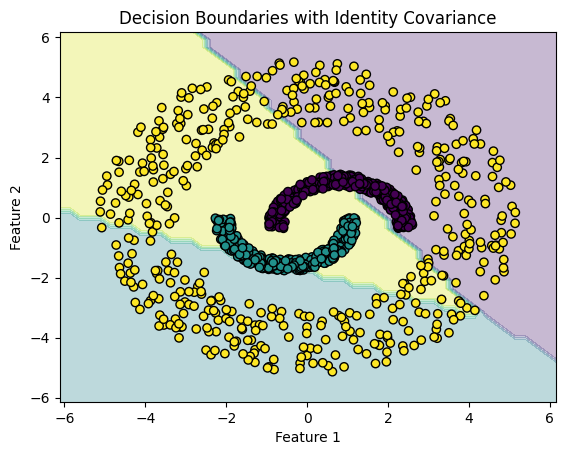

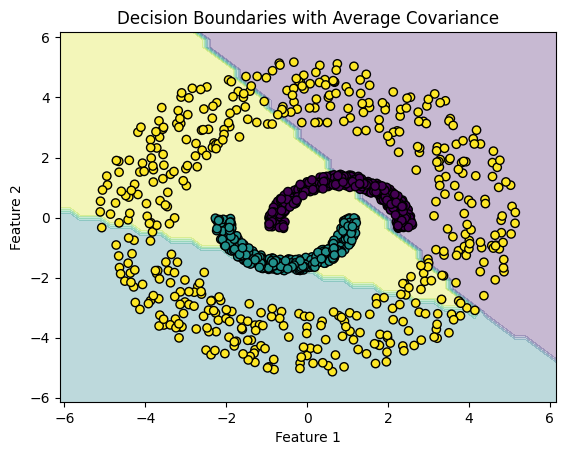

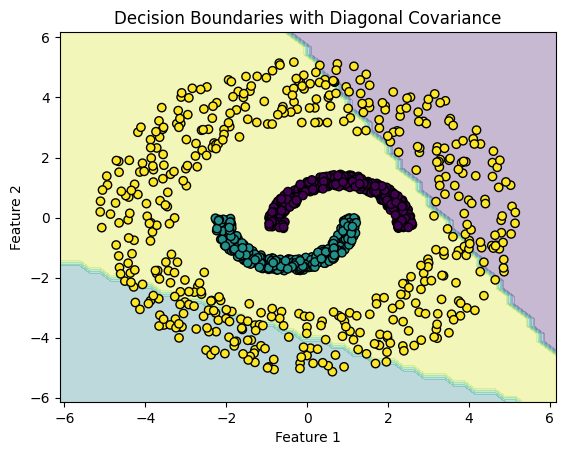

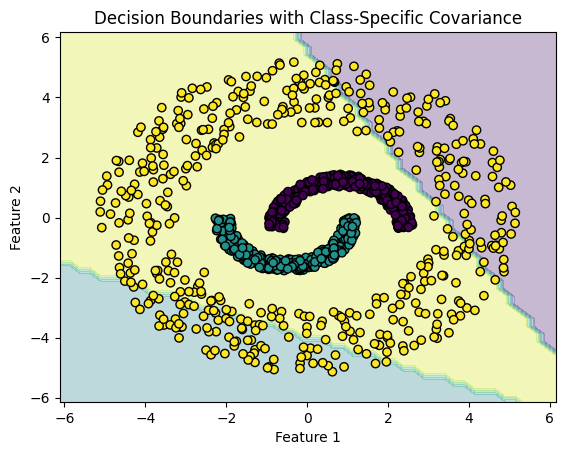

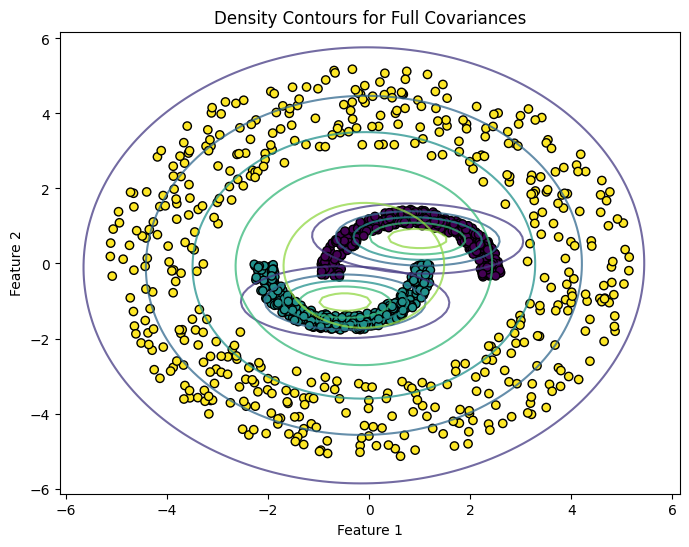

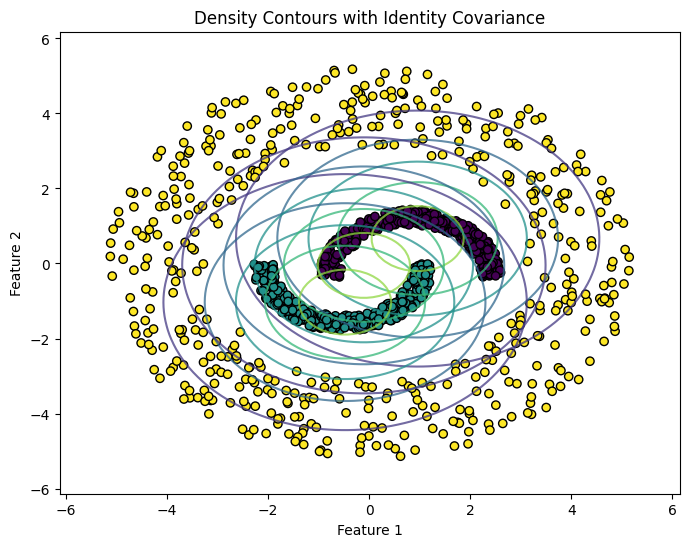

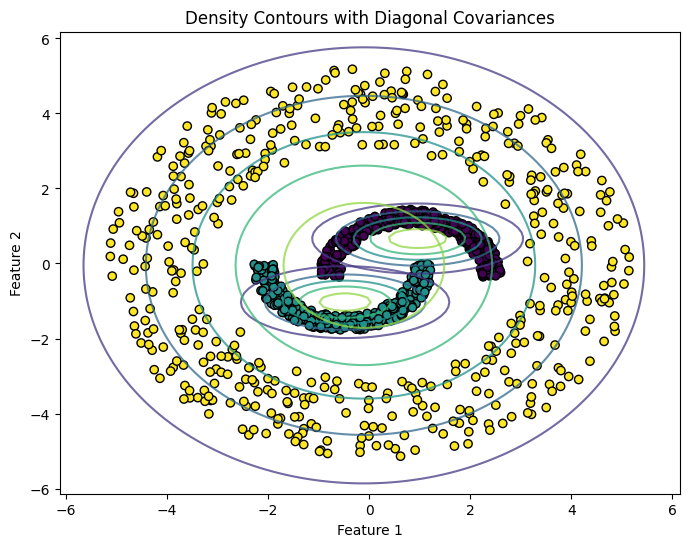

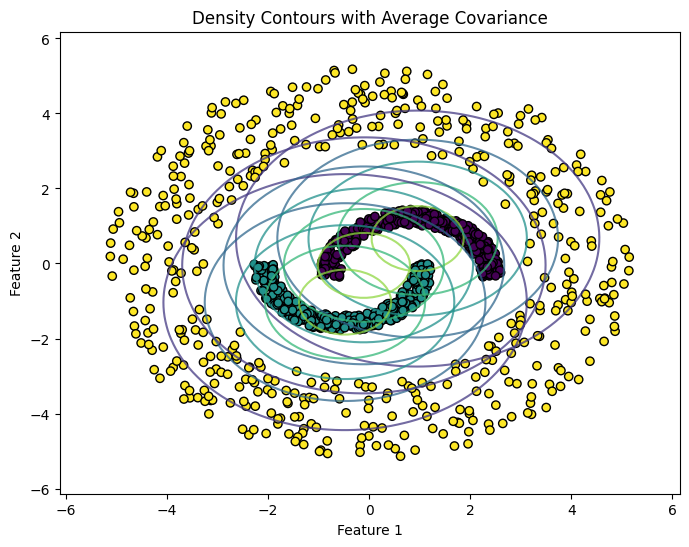

In [3]:
'''
   How to run our code
1. import the two libraries
2. import numpy as np
import matplotlib.pyplot as pl

There may be change in file path, change the file_path according the file of GR06_NLS.txt
'''



import numpy as np
import matplotlib.pyplot as plt

# Function to compute the Gaussian density
def compute_gaussian_density(x, mean, cov):
    size = len(x)
    det_cov = np.linalg.det(cov)
    norm_const = 1.0 / (np.power((2 * np.pi), size / 2) * np.power(det_cov, 0.5))
    x_minus_mean = np.matrix(x - mean)
    inv_cov = np.linalg.inv(cov)
    exp_term = np.exp(-0.5 * (x_minus_mean * inv_cov * x_minus_mean.T))
    return norm_const * exp_term

# Function to classify a point based on posterior probability
def predict_class(x, mean1, mean2, mean3, cov, priors):
    post_class1 = calculate_posterior(x, mean1, cov, priors[0])
    post_class2 = calculate_posterior(x, mean2, cov, priors[1])
    post_class3 = calculate_posterior(x, mean3, cov, priors[2])
    return np.argmax([post_class1, post_class2, post_class3])

# Function to compute posterior probability
def calculate_posterior(x, mean, cov, prior):
    likelihood = compute_gaussian_density(x, mean, cov)
    return likelihood * prior

# Function to load and split data
def load_and_split_data(file_path):
    with open(file_path, 'r') as file:
        lines = file.readlines()

    data_class1, data_class2, data_class3 = [], [], []

    for i in range(1, 501):
        point = lines[i].split()
        data_class1.append([float(point[0]), float(point[1])])

    for i in range(501, 1001):
        point = lines[i].split()
        data_class2.append([float(point[0]), float(point[1])])

    for i in range(1001, 1701):
        point = lines[i].split()
        data_class3.append([float(point[0]), float(point[1])])

    class1 = np.array(data_class1)
    class2 = np.array(data_class2)
    class3 = np.array(data_class3)

    # Split data into training and testing sets
    train_data1, test_data1 = split_data(class1)
    train_data2, test_data2 = split_data(class2)
    train_data3, test_data3 = split_data(class3)

    # Combine data from all classes
    train_data = np.vstack((train_data1, train_data2, train_data3))
    train_labels = np.array([0] * len(train_data1) + [1] * len(train_data2) + [2] * len(train_data3))

    test_data = np.vstack((test_data1, test_data2, test_data3))
    test_labels = np.array([0] * len(test_data1) + [1] * len(test_data2) + [2] * len(test_data3))

    return train_data, train_labels, test_data, test_labels

# Function to split data into training and test sets
def split_data(data, train_ratio=0.7):
    np.random.shuffle(data)
    split_idx = int(train_ratio * len(data))
    return data[:split_idx], data[split_idx:]

# Function to compute mean vector and covariance matrix
def calculate_mean_cov(data):
    num_samples = data.shape[0]
    mean_vector = np.mean(data, axis=0)
    centered_data = data - mean_vector
    cov_matrix = np.dot(centered_data.T, centered_data) / (num_samples - 1)
    return mean_vector, cov_matrix

# Function to compute metrics
def compute_performance_metrics(true_labels, predictions, num_classes):
    cm = calculate_confusion_matrix(true_labels, predictions, num_classes)
    accuracy = calculate_accuracy(true_labels, predictions)
    precision = calculate_precision(true_labels, predictions, num_classes)
    mean_precision = np.mean(precision)
    recall = calculate_recall(true_labels, predictions, num_classes)
    mean_recall = np.mean(recall)
    f1 = calculate_f1_score(true_labels, predictions, num_classes)
    mean_f1 = np.mean(f1)

    return cm, accuracy, precision, mean_precision, recall, mean_recall, f1, mean_f1

# Function to calculate the confusion matrix
def calculate_confusion_matrix(true_labels, predictions, num_classes):
    cm = np.zeros((num_classes, num_classes), dtype=int)
    for true, pred in zip(true_labels, predictions):
        cm[true, pred] += 1
    return cm

# Function to calculate accuracy score
def calculate_accuracy(true_labels, predictions):
    return np.mean(np.array(true_labels) == np.array(predictions))

# Function to calculate precision score
def calculate_precision(true_labels, predictions, num_classes):
    cm = calculate_confusion_matrix(true_labels, predictions, num_classes)
    precision = np.diag(cm) / np.sum(cm, axis=0)
    return np.nan_to_num(precision)

# Function to calculate recall score
def calculate_recall(true_labels, predictions, num_classes):
    cm = calculate_confusion_matrix(true_labels, predictions, num_classes)
    recall = np.diag(cm) / np.sum(cm, axis=1)
    return np.nan_to_num(recall)

# Function to calculate F1 score
def calculate_f1_score(true_labels, predictions, num_classes):
    precision = calculate_precision(true_labels, predictions, num_classes)
    recall = calculate_recall(true_labels, predictions, num_classes)
    f1 = 2 * (precision * recall) / (precision + recall)
    return np.nan_to_num(f1)

# Function to plot decision regions
def plot_decision_boundaries(data, labels, classifier_function, title):
    x_min, x_max = data[:, 0].min() - 1, data[:, 0].max() + 1
    y_min, y_max = data[:, 1].min() - 1, data[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 50), np.linspace(y_min, y_max, 50))

    Z = np.array([classifier_function(np.array([x, y]), priors) for x, y in zip(xx.ravel(), yy.ravel())])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.3)
    plt.scatter(data[:, 0], data[:, 1], c=labels, edgecolor='k')
    plt.title(title)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.show()

# Function to plot contours
def plot_density_contours(data, labels, means, covariances, title):
    x_min, x_max = data[:, 0].min() - 1, data[:, 0].max() + 1
    y_min, y_max = data[:, 1].min() - 1, data[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))

    plt.figure(figsize=(8, 6))
    for mean, cov in zip(means, covariances):
        Z = np.array([compute_gaussian_density(np.array([x, y]), mean, cov) for x, y in zip(xx.ravel(), yy.ravel())])
        Z = Z.reshape(xx.shape)
        plt.contour(xx, yy, Z, levels=5, alpha=0.75)

    plt.scatter(data[:, 0], data[:, 1], c=labels, edgecolor='k')
    plt.title(title)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.show()

# Define paths and parameters
file_path = 'NLS.txt'
train_data, train_labels, test_data, test_labels = load_and_split_data(file_path)

# Calculate means and covariances
mean1, cov1 = calculate_mean_cov(train_data[train_labels == 0])
mean2, cov2 = calculate_mean_cov(train_data[train_labels == 1])
mean3, cov3 = calculate_mean_cov(train_data[train_labels == 2])

# Average covariance
average_cov = (cov1 + cov2 + cov3) / 3
identity_cov = np.diag(np.diag(average_cov))

# Diagonal covariances for each class
diag_cov1 = np.diag(np.diag(cov1))
diag_cov2 = np.diag(np.diag(cov2))
diag_cov3 = np.diag(np.diag(cov3))

# Priors
priors = np.array([len(train_data[train_labels == i]) for i in range(3)]) / len(train_data)

# Define classifiers
def classifier_with_identity_cov(x, priors):
    return predict_class(x, mean1, mean2, mean3, identity_cov, priors)

def classifier_with_avg_cov(x, priors):
    return predict_class(x, mean1, mean2, mean3, average_cov, priors)

def classifier_with_diag_cov(x, priors):
    label = np.argmax(priors)
    if label == 0:
        return predict_class(x, mean1, mean2, mean3, diag_cov1, priors)
    elif label == 1:
        return predict_class(x, mean1, mean2, mean3, diag_cov2, priors)
    else:
        return predict_class(x, mean1, mean2, mean3, diag_cov3, priors)

def classifier_with_class_specific_cov(x, priors):
    label = np.argmax(priors)
    if label == 0:
        return predict_class(x, mean1, mean2, mean3, cov1, priors)
    elif label == 1:
        return predict_class(x, mean1, mean2, mean3, cov2, priors)
    else:
        return predict_class(x, mean1, mean2, mean3, cov3, priors)

# Make predictions
predictions_identity_cov = np.array([classifier_with_identity_cov(x, priors) for x in test_data])
predictions_avg_cov = np.array([classifier_with_avg_cov(x, priors) for x in test_data])
predictions_diag_cov = np.array([classifier_with_diag_cov(x, priors) for x in test_data])
predictions_class_specific_cov = np.array([classifier_with_class_specific_cov(x, priors) for x in test_data])

# Compute and display metrics
metrics_identity_cov = compute_performance_metrics(test_labels, predictions_identity_cov, 3)
metrics_avg_cov = compute_performance_metrics(test_labels, predictions_avg_cov, 3)
metrics_diag_cov = compute_performance_metrics(test_labels, predictions_diag_cov, 3)
metrics_class_specific_cov = compute_performance_metrics(test_labels, predictions_class_specific_cov, 3)

def display_metrics(title, metrics):
    cm, accuracy, precision, mean_precision, recall, mean_recall, f1, mean_f1 = metrics
    print(f"{title}")
    print("Confusion Matrix:")
    print(cm)
    print(f"Accuracy: {accuracy}")
    print(f"Precision: {precision}")
    print(f"Mean Precision: {mean_precision}")
    print(f"Recall: {recall}")
    print(f"Mean Recall: {mean_recall}")
    print(f"F-measure: {f1}")
    print(f"Mean F-measure: {mean_f1}\n")

display_metrics("Classifier with Identity Covariance", metrics_identity_cov)
display_metrics("Classifier with Average Covariance", metrics_avg_cov)
display_metrics("Classifier with Diagonal Covariance", metrics_diag_cov)
display_metrics("Classifier with Class-Specific Covariance", metrics_class_specific_cov)

# Plot decision regions
plot_decision_boundaries(train_data, train_labels, classifier_with_identity_cov, "Decision Boundaries with Identity Covariance")
plot_decision_boundaries(train_data, train_labels, classifier_with_avg_cov, "Decision Boundaries with Average Covariance")
plot_decision_boundaries(train_data, train_labels, classifier_with_diag_cov, "Decision Boundaries with Diagonal Covariance")
plot_decision_boundaries(train_data, train_labels, classifier_with_class_specific_cov, "Decision Boundaries with Class-Specific Covariance")

# Plot density contours
plot_density_contours(train_data, train_labels, [mean1, mean2, mean3], [cov1, cov2, cov3], "Density Contours for Full Covariances")
plot_density_contours(train_data, train_labels, [mean1, mean2, mean3], [identity_cov] * 3, "Density Contours with Identity Covariance")
plot_density_contours(train_data, train_labels, [mean1, mean2, mean3], [diag_cov1, diag_cov2, diag_cov3], "Density Contours with Diagonal Covariances")
plot_density_contours(train_data, train_labels, [mean1, mean2, mean3], [average_cov] * 3, "Density Contours with Average Covariance")
